#**3장. 머신 러닝 핵심 알고리즘**

**3.1 지도 학습**

    지도 학습 알고리즘
    3.1.1 K-최근접 이웃
    3.1.2 서포트 벡터 머신
    3.1.3 결정 트리
    3.1.4 로지스틱 회귀와 선형 회귀

**3.2 비지도 학습**

    비지도 학습 알고리즘
    3.2.1 K-평균 군집화
    3.2.2 밀도 기반 군집 분석
    3.2.3 주성분 분석(PCA)

# 3.1 지도 학습

지도 학습 : 정답(레이블(label))을 컴퓨터에 미리 알려 주고 데이터를 학습시키는 방법

- 분류 : 주어진 데이터를 정해진 범주에 따라 분류
  1. 데이터 유형 : 이산형 데이터
  2. 결과 : 훈련 데이터의 레이블(정답) 중 하나 예측
  3. 예시 : 학습 데이터를 A,B,C 그룹 중 하나로 매핑 (ex: 스팸 메일 필터링)

- 회귀 : 데이터들의 특성을 기준으로 연속된 값을 그래프로 표현하여 패턴이나 트렌드를 예측할 떄 사용
  1. 데이터 유형 : 연속형 데이터
  2. 결과 : 연속된 값을 예측
  3. 예시 : 결괏값이 어떤 값으로든 나올 수 있음 (ex: 주가 분석 예측)

***지도 학습의 알고리즘***

**3.1.1 K-최근접 이웃 (K-nearest neighbor**)

: 새로운 입력을 받았을 때, 기존 데이터와의 거리를 계산하고 가장 가까운 데이터 K개를 선택하여 해당 클러스터로 할당하는 분류 알고리즘

- 과거 데이터를 저장해두고, 필요할 때마다 비교를 수행하는 방식 (미리 분류 모형 만들어둠 XX)
- K값에 따라 성능이 달라질 수 있으므로 초기 설정이 중요함
- 예) K=3일 때
  
  1)주변 범주 3개가 주황색 -> 주황색으로 분류

  2)주변 범주 두 개가 녹색, 하나가 주황색 -> 녹색으로 분류

In [1]:
#붓꽃에 대한 분류 - K-최근접 이웃 알고리즘을 이용하여
#목표 : 적당한 K값 예측

#1. 라이브러리 호출
import numpy as np #벡터 및 행렬의 연산 처리를 위한 라이브러리
import matplotlib.pyplot as plt #데이터를 차트나 플롯(plot)으로 그려주는 라이브러리
import pandas as pd #데이터 분석 및 조작을 위한 라이브러리
from sklearn import metrics #모델 성능 평가

In [2]:
#2. 데이터셋 준비
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class'] #열(column) 이름 할당

dataset = pd.read_csv('/content/drive/MyDrive/pytorch_ex/chap03/data/iris.data', names=names) #데이터를 판다스 데이터프레임에 저장
print(dataset.shape)

(150, 5)


In [3]:
#3. 훈련세트 데이터세트 분리
x = dataset.iloc[:, :-1].values #모든 행, 뒤에서 하나 뺀 열 선택
y = dataset.iloc[:, -1].values #모든 행, 마지막 열 선택

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

from sklearn.preprocessing import StandardScaler
s = StandardScaler() #특성 스케일링(scaling). 평균0 분산1 되도록 표준화 전처리
s.fit(x_train)
x_train = s.transform(x_train)
x_test = s.transform(x_test)

In [4]:
#4. 모델 생성 및 훈련
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50) #K=50인 K-최근접 이웃 모델 생성
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [5]:
#5. 모델 정확도 측정
from sklearn.metrics import accuracy_score

y_pred = knn.predict(x_test)
print(f'정확도: { accuracy_score(y_test, y_pred)}')

정확도: 0.8666666666666667


In [6]:
#6. 최적의 K값 찾기
k = 10
acc_array = np.zeros(k)

for k in np.arange(1, k+1) : #k값을 1~10으로 반복
  classifier = KNeighborsClassifier(n_neighbors=k) #모델 생성
  classifier = classifier.fit(x_train, y_train) #모델 훈련
  y_pred = classifier.predict(x_test) #테스트세트 예측값
  acc = metrics.accuracy_score(y_test, y_pred) #정확도
  acc_array[k-1] = acc #측정한 정확도를 acc_array배열에 추가

max_acc = np.amax(acc_array) #가장 큰 정확도(최적의 정확도)
acc_list = list(acc_array)
k = acc_list.index(max_acc) + 1 #최적의 K값
print(f'정확도 {max_acc}으로 최적의 k는 {k}입니다')

정확도 0.9666666666666667으로 최적의 k는 10입니다


**3.1.2 서포트 벡터 머신 (Support Vector Machine, SVM)**

: 분류를 위한 기준선을 정의하는 모델

    - 결정 경계 : 데이터를 분류하기 위한 기준선
    - 마진(margin) : 결정 경계와 서포트 벡터 사이의 거리
    - 서포트 벡터(support vector) : 결정 경계와 가까이 있는 데이터들
    - 이상치(outlier) : 패턴에서 벗어난 값
    - 하드 마진(hard margin) : 이상치를 허용하지 않는 것
    - 소프트 마진(soft margin) : 어느정도의 이상치가 마진 안에 포함되는 것을 허용하는 것

    - 커널 트릭(kernel trick) : 수학적 기교를 통해 저차원 데이터를 고차원으로 보내어 비선형 분류 문제를 해결하고자 도입
    - 선형 커널(linear kernel) : 선형으로 분류 가능한 데이터에 적용(기본 커널 트릭, 커널 트릭 사용Xx)
    - 다항식 커널(polynomial kernel) : 입력 벡터를 고차원으로 매핑하여 비선형 분류가 필요한 데이터에 적용(차수에 한계 Oo)
    - 가우시안 RBF 커널(Gaussian RBF kernel) : 입력 벡터를 무한한 고차원으로 매핑하여 비선형 분류가 필요한 데이터에 적용(차수 한계 Xx)


  - 결정 경계는 데이터가 분류된 클래스에서 가장 멀리 떨어져 있을 때(=마진 크기 최대화) 성능이 가장 좋음
  - 분류의 종류 : 선형 분류, 비선형 분류(저차원 데이터를 고차원으로 보내서 문제 해결)
  - 선형 커널과 가우시안 RBF 커널은 실제로 특성을 추가하는 게 아닌, 다양한 특성 조합이 생기는 것과 같은 효과를 구현하는 것

In [7]:
#붓꽃에 대한 분류 - 서포트 벡터 머신 알고리즘을 이용하여
#목표 : 네 가지 특성으로 붓꽃(iris) 분류

#1. 라이브러리 호출
from sklearn import svm #서포트 벡터 머신 라이브러리
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection
import tensorflow as tf
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [8]:
#2. 데이터셋 준비 및 분리
iris = datasets.load_iris() #사이킷런 제공 iris 데이터 호출
x_train, x_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size=0.6, random_state=42)

In [9]:
#3. 모델 생성, 훈련, 정확도

svm = SVC(kernel='linear', C=1.0, gamma=0.5)
#커널-선형 커널(선형 분류)  /  C-오류 어느정도 허용할지(클수록 하드마진, 작을수록 소프트마진)  /  감마-결정 경계를 얼마나 유연하게 할지(클수록 과적합 초래할 수도)

svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
score = metrics.accuracy_score(y_test, y_pred)

print(f'정확도: {score}')

정확도: 0.9888888888888889


**3.1.3 결정 트리(decision tree)**

: 데이터를 1차로 분류한 후, 각 영역의 순도(homogeneity)는 증가하고 불순도(impurity) 및 불확실성(uncertainity)은 감수하는 방향으로 학습을 진행

    - 정보 획득(information gain) : 순도가 증가하고 불확실성이 감소하는 것
    - 순도 : 범주 안에서 같은 종류의 데이터만 모여 있는 상태
    - 불순도 : 범주 안에 다른 종류의 데이터가 섞여 있는 상태
    - 랜덤 포레스트(random forest) : 결정 트리를 여러 개 묶어 놓은 것
  - 결정 트리에서 불확실성을 계산하는 방법
    1. 엔트로피(entropy) : 확률변수의 불확실성을 수치로 나타낸 것.
      - " 엔트로피 = 0 " == 불확실성 최소 == 순도 최대
      - " 엔트로피 = 0.5 " ==  불확실성 최대 == 순도 최소
    2. 지니 계수(Gini index) : 불순도를 측정하는 지표. 임의의 원소 2개가 서로 다른 그룹에 속해 있을 확률
      - 지니 계수가 높을수록 데이터가 분산되어 있음
      - 로그 계산이 없어 엔트로피보다 연산 빠름

In [10]:
#타이타닉 승객 생존 여부 예측 - 결정 트리 알고리즘을 이용하여

#1. 라이브러리 호출
import pandas as pd

#2. 데이터 준비
df = pd.read_csv('/content/drive/MyDrive/pytorch_ex/chap03/data/titanic/train.csv', index_col='PassengerId')
print(df.head())

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

In [11]:
#3. 데이터 전처리
df = df[ ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']] #해당 열만 사용
df['Sex'] = df['Sex'].map( {'male':0, 'female':1} ) #성별 값을 0,1의 정수값으로 변환
df = df.dropna() #값이 없는 데이터 삭제
x = df.drop('Survived', axis=1) #삭제할 레이블 명 / 해당 레이블의 축(axis=1로 '열'임을 알려줌)
y = df['Survived']
print(x.head())
print(y.head())

             Pclass  Sex   Age  SibSp  Parch     Fare
PassengerId                                          
1                 3    0  22.0      1      0   7.2500
2                 1    1  38.0      1      0  71.2833
3                 3    1  26.0      0      0   7.9250
4                 1    1  35.0      1      0  53.1000
5                 3    0  35.0      0      0   8.0500
PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64


<ipython-input-11-a0c13c55219a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map( {'male':0, 'female':1} ) #성별 값을 0,1의 정수값으로 변환


In [12]:
#3. 데이터 전처리 - 훈련 세트와 테스트 세트 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [13]:
#4. 결정 트리 모델 생성
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [14]:
#5. 모델 훈련
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [15]:
#6. 모델 예측
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8268156424581006

In [16]:
#7. 혼동 행렬을 이용한 성능 측정
from sklearn.metrics import confusion_matrix
conf_matrix = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns = ['Predicted Not Survival', 'Predicted Survival'],
    index = ['True Not Survival', 'True Survival']
)
print(conf_matrix)

                   Predicted Not Survival  Predicted Survival
True Not Survival                      98                  14
True Survival                          17                  50


**3.1.4 로지스틱 회귀와 선형 회귀**

회귀(Regression) : 두 개의 변수가 주어졌을 때, 한 변수에서 다른 변수를 예측하거나 두 변수의 관계를 규명하는 데 사용하는 방법

    - 독립(예측) 변수 : 영향을 미치는 변수
    - 종속(기준) 변수 : 영향을 받는 변수

1. 로지스틱 회귀 (Logistic Regression)
: 개별 관측치들을 어느 **집단**으로 **분류**할 수 있는지 분석하고 예측하는 모형
- 종속 변수 종류 : 이산형 변수 (즉, 특정 집단으로 나뉘어진 변수)
- 모형 탐색 방법 : 최대우도법 (X를 넣었을 때 실제값 Y가 나타날 확률이 가장 높은 모델을 찾는 방법)
- 사건의 확률(0 또는 1)을 확인하는 데 사용됨 (0~1 범위 내에서만 존재하는 S-커브로 그려짐)
- 로지스틱 회귀 분석의 단계

  (1) : 각 집단에 속할 확률 예측. (이진 분류의 경우 Y=1일 확률을 구함)

  (2) : 분류 기준 값(cut-off)을 설정 후 특정 범주로 분류

    ex) P(Y=1) >= 0.5 : 집단 1로 분류 / P(Y=1) < 0.5 : 집단 0으로 분류

In [17]:
#신규 데이터(숫자, digit)에 대한 정확한 예측 - 로지스틱 회귀를 이용하여

#1. 라이브러리 호출 및 데이터 준비
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()

print('Image Data Shape', digits.data.shape) #사진이 1797개 있으며, 8x8의 64차원
print('Label Data Shape', digits.target.shape) #타깃 이미지(숫자 정보)가 1797개 있음

Image Data Shape (1797, 64)
Label Data Shape (1797,)


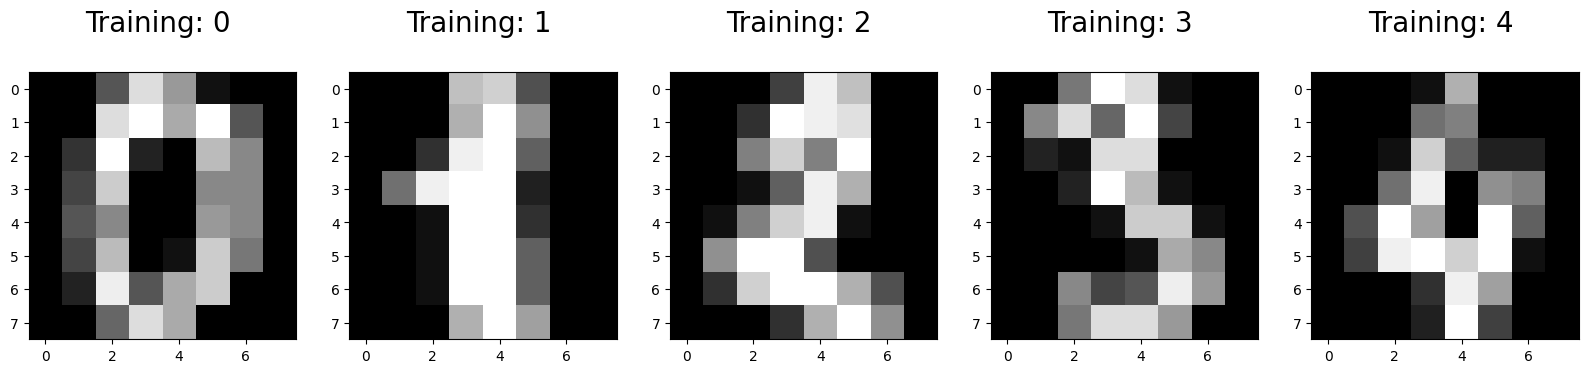

In [18]:
#2. digit 데이터의 시각화

import numpy as np
import matplotlib.pyplot as plt

plt.figure( figsize=(20,4) )
for index, (image, label) in enumerate( zip(digits.data[0:5], digits.target[0:5]) ) :
  plt.subplot(1, 5, index+1) #사진이 옆으로 나열되게~
  plt.imshow( np.reshape(image, (8,8)), cmap=plt.cm.gray )
  plt.title( f'Training: {label} \n', fontsize=20 )

In [19]:
#3. 훈련 세트, 데이터세트 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

#4. 로지스틱 회귀 모델 생성 및 훈련
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression() #로지스틱 회귀 모델 생성
logisticRegr.fit(x_train, y_train) #모델 훈련

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
print(x_test[0])

[ 0.  0. 11. 16. 15.  3.  0.  0.  0.  5. 16. 12. 11. 13.  0.  0.  0.  3.
 13.  1.  5. 15.  0.  0.  0.  0.  0.  0. 12. 11.  0.  0.  0.  0.  0.  1.
 16.  7.  0.  0.  0.  0.  0. 10. 15.  0.  0.  0.  0.  0. 12. 16. 16. 11.
  1.  0.  0.  0. 13. 13.  8. 13. 16.  8.]


In [21]:
#일부 데이터 사용한 모델 예측
print( logisticRegr.predict(x_test[0:10]) )

[2 8 2 6 6 7 1 9 8 5]


In [22]:
#전체 데이터 사용한 모델 예측
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


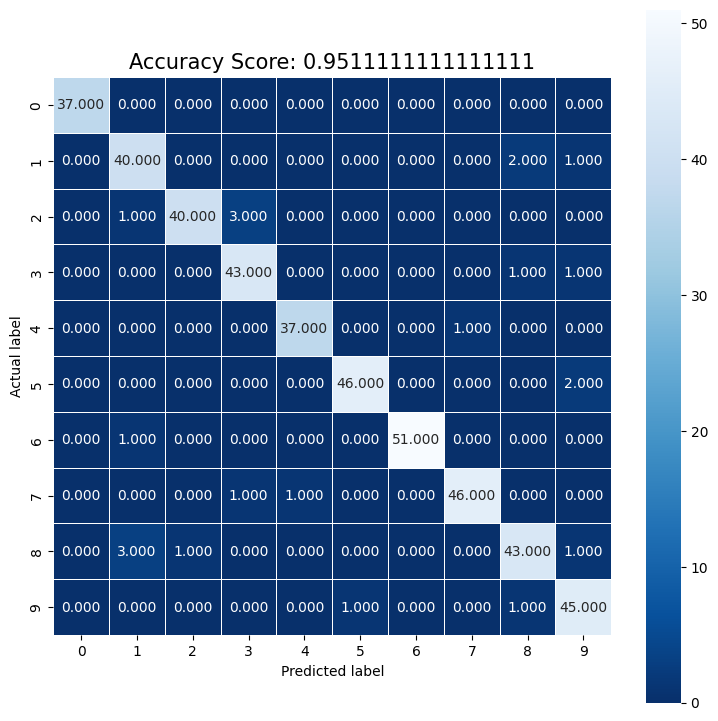

In [23]:
#혼동 행렬 시각화
import seaborn as sns
from sklearn import metrics

predictions = logisticRegr.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions) #혼동 행렬

plt.figure(figsize=(9,9))
sns.heatmap( cm, annot=True, fmt='.3f', linewidths=.5, square=True, cmap='Blues_r') ; #heatmap으로 출력
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'Accuracy Score: {score}'
plt.title(all_sample_title, size=15) ;
plt.show();

2. 선형 회귀(Linear Regression) : 독립 변수를 사용하여 종속 변수의 움직임을 예측하고 설명하는 데 사용되는 모형

- 종속 변수 종류 : 연속형 변수 (데이터 간 관계성이 있음)
- 모형 탐색 방법 : 제곱오차 (=최소제곱법)
- 종속 변수와 독립 변수 간의 **관계**를 설정하는 데 사용됨 (직선 모델을 출력)
- 독립 변수 x는 하나일 수도, 여러 개일 수도 있음

    - 단순 선형 회귀(Simple Linear Regression) : 하나의 x값으로 y값을 설명할 수 있는 경우
    - 다중 선형 회귀(Multiple Linear Regression) : x값이 여러 개인 경우

In [24]:
#훈련 데이터(특성)에서 최대 기온 예측 - 선형 회귀를 이용하여

#1. 라이브러리 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

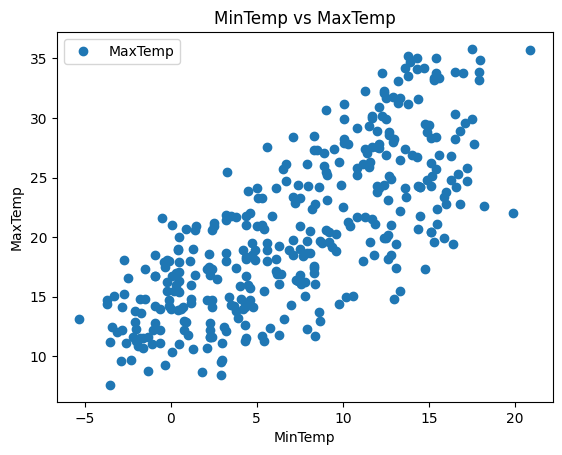

In [25]:
#2. 데이터셋 준비
dataset = pd.read_csv('/content/drive/MyDrive/pytorch_ex/chap03/data/weather.csv')

#데이터 간 관계 시각화로 표현해보기
dataset.plot(x='MinTemp', y='MaxTemp', style='o') #최소 기온과 최대 기온을 산점도로 표현
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [26]:
#3. 입력 데이터(최소 기온), 타겟 데이터(최대 기온) 분리
x = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [27]:
#4. 모델 생성 및 훈련
linearRegr = LinearRegression()
linearRegr.fit(x_train, y_train)

LinearRegression()

In [28]:
#5. 회귀 모델에 대한 예측
y_pred = linearRegr.predict(x_test)
df = pd.DataFrame( {'Actual':y_test.flatten(),
                    'Predicted':y_pred.flatten()} )
print(df)

    Actual  Predicted
0     11.6  16.330775
1     17.0  14.697709
2     19.0  15.514242
3     13.7  21.474935
4     32.1  24.577762
..     ...        ...
69    27.6  24.006189
70    11.5  13.146295
71    16.4  20.413442
72    21.8  17.310615
73    10.6  15.514242

[74 rows x 2 columns]


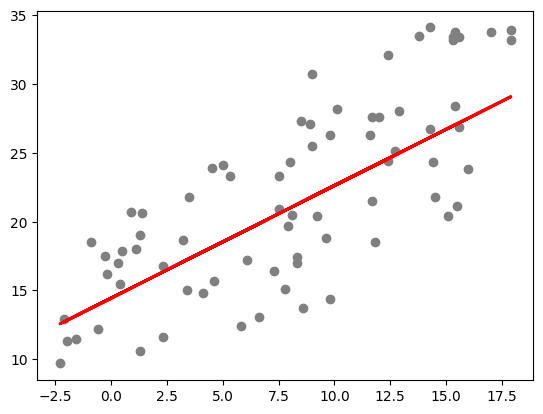

In [29]:
#6. 테스트 세트를 이용하여 회귀선 표현
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

In [30]:
#7. 선형 회귀 모델 평가
print('평균 제곱 오차:', metrics.mean_squared_error(y_test, y_pred))
print('루트 평균 제곱 오차:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

평균 제곱 오차: 19.828110077080634
루트 평균 제곱 오차: 4.452876606990209


# 3.2 비지도 학습

비지도 학습 : 정답(label)이 없는 상태에서 데이터를 훈련시키는 방법

- 군집(clustering) : 각 데이터의 유사성(거리)을 측정한 후 유사성이 높은(거리가 가까운) 데이터끼리 집단으로 분류하는 것
  1. 목표 : 데이터 그룹화
  2. 주요 알고리즘 : K-평균 군집화(K-means)
  3. 예시 : 사용자의 관심사에 따라 그룹화 -> 마케팅에 활용
  4. 군집 == 군집화 == 클러스터
  5. 데이터 간 유사도(거리) 측정 방법 : 유클리드 거리, 맨헤튼 거리, 민코프스키 거리, 코사인 유사도 등

- 차원 축소(dimensionality reduction) : 차원을 나타내는 특성을 줄여 데이터를 줄이는 방식
  1. 목표 : 데이터 간소화
  2. 주요 알고리즘 : 주성분 분석(PCA)
  3. 예시 : 데이터 압축, 중요한 속성 도출

**3.2.1 K-평균 군집화 (K-means clustering)**

: 데이터를 입력받아 K개의 중심점을 이용해 소수의 그룹으로 묶는 알고리즘

    - 클러스터링 : 데이터를 덩어리로 묶는 과정
    - 클러스터 : 분류된 덩어리 자체
    - 군집 == 군집화 == 클러스터

- 레이블이 없던 각 데이터에 **레이블을 할당**하여 군집화 수행
- 학습 과정

  (1) 중심점 선택 : 무작위로 K개의 초기 중심점(centroid) 선택, k값에 따라 성능이 달라짐

  (2) 클러스터 할당 : K개의 중심점과 개별 데이터간의 거리를 측정한 후, K개 중 가장 가까운 중심점을 기준으로 클러스터링함

  (3) 새로운 중심점 선택 : 새로운 중심점을 정의하고, (2)와 같은 과정을 반복하며 새로운 클러스터 할당

  (4) 범위 확인(convergence) : 선택한 중심점에 더이상 변화가 없을 시 멈추고, 변화가 있다면 (2)~(3) 반복
- K-평균 군집화 알고리즘이 성능이 떨어지는 경우

  - 데이터가 비선형일 때
  - 군집 크기가 서로 다를 때
  - 군집마다 밀집도(density)가 다를 때

In [31]:
#적정한 K값에 대한 예측 - K-평균 군집화 알고리즘을 이용하여

#1. 라이브러리 호출
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [32]:
#데이터셋 준비

data = pd.read_csv('/content/drive/MyDrive/pytorch_ex/chap03/data/sales data.csv') #상품에 대한 연 지출 데이터
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


**데이터 유형**

  - 수치형 데이터 : 관측된 값이 수치로 측정되는 자료 (ex: 키, 몸무게, 자동차 사고 건수)

    - 연속형 데이터 : 값이 연속적인 자료 (ex: 키, 몸무게)
    - 이산형 데이터 : 셀 수 있는 자료 (ex: 자동차 사고 건수)

  - 범주형 데이터 : 고나측 결과가 몇 개의 범주 또는 항목의 형태로 나타나는 자료 (ex: 성별(남/여), 선호도(좋음/보통/싫음))

    - 순위형 데이터 : 범주 간에 순서 의미가 있는 자료 (ex: 매우 좋음 -> 좋음 ->싫음 -> 매우 싫음)
    - 명목형 데이터 : 범주 간에 순서 의미가 없는 자료 (ex: 혈액형, 성별)

In [33]:
#2. 데이터 전처리

  #연속형 데이터와 명목형 데이터로 분류
categorical_features = ['Channel', 'Region'] #명목형 데이터
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'] #연속형 데이터(연간 지출)

  #명목형 데이터 - True, False로 바꾸기
for col in categorical_features :
  dummies = pd.get_dummies(data[col], prefix=col) #명목형 데이터를 pd.get_dummies() 이용하여 숫자(0,1)로 변환
  data = pd.concat( [data, dummies], axis=1 ) #가로로 이어붙임
  data.drop(col, axis=1, inplace=True) #기존 명목형 데이터 열 뺌으로써, 수치형 데이터 열로 남김

data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,False,True,False,False,True
1,7057,9810,9568,1762,3293,1776,False,True,False,False,True
2,6353,8808,7684,2405,3516,7844,False,True,False,False,True
3,13265,1196,4221,6404,507,1788,True,False,False,False,True
4,22615,5410,7198,3915,1777,5185,False,True,False,False,True


In [34]:
  #연속형 데이터 - 스케일링(모든 특성에 동일하게 중요성 부여하기 위해~)
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)
print(data_transformed[:5])

[[0.11294004 0.13072723 0.08146416 0.0031063  0.0654272  0.02784731
  0.         1.         0.         0.         1.        ]
 [0.06289903 0.13282409 0.10309667 0.02854842 0.08058985 0.03698373
  0.         1.         0.         0.         1.        ]
 [0.05662161 0.11918086 0.08278992 0.03911643 0.08605232 0.16355861
  0.         1.         0.         0.         1.        ]
 [0.11825445 0.01553586 0.04546385 0.10484189 0.01234568 0.03723404
  1.         0.         0.         0.         1.        ]
 [0.20162642 0.07291369 0.07755155 0.063934   0.04345483 0.10809345
  0.         1.         0.         0.         1.        ]]


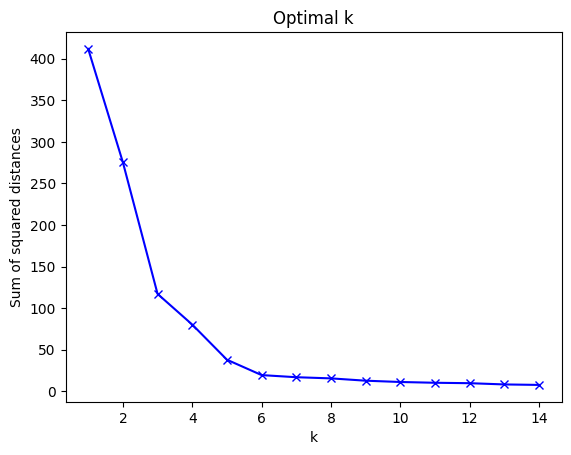

In [35]:
#3. 적당한 K값 추출

Sum_of_squared_distances = [] #거리 제곱의 합.

for k in range(1,15) :
  km = KMeans(n_clusters=k) #K값이 k인 K-평균 군집화 모델 생성
  km = km.fit(data_transformed) #훈련
  Sum_of_squared_distances.append(km.inertia_) #각 모델의 거리 제곱의 합 추가


plt.plot(range(1,15), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Optimal k')
plt.show()

#k값이 커질수록 각 샘플이 하나의 클러스터가 되어버려서 거리 제곱 합이 0과 같아짐 주의!

**3.2.2 밀도 기반 군집 분석 (Density-Based Spatial Clustering of Applications with Noise, DBSCAN)**

: 일정 밀도 이상을 가진 데이터를 기준으로 군집을 형성하는 방법

    - 노이즈(noise) : 주어진 데이터셋과 무관한 데이터 또는 무작위성 데이터. 전처리 과정에서 제거해야 함(이상치는 관측 범위에서 >벗어난< 값으로 제거Xx)
    - 엡실론(epsilon) : 두 점 사이의 거리. 임계치(범주) 역할 수행
    - m(minPts) : 엡실론 내 데이터 개수. 중심점을 만드는 구성 요건

  - 노이즈(noise)의 영향을 받지 않음
  - K-평균 군집화에 비해 연산량은 많지만, K-평균 군집화가 잘 처리하지 못하는 오목하거나 볼록한 부분을 처리하는 데 유용함
  - 학습 과정

    (1) 엡실론 내 점 개수 확인 / 중심점 선택
      : 거리 엡실론 내 점이 m개 이상 있는 중심점을 설정하고, 해당 반경을 하나의 군집으로 생성

    (2) 새로운 군집 생성
      : 위 중심점의 주위 점들을 대상으로, 중심점 기준을 만족하는 데이터를 지정해 새로운 군집 생성

    (3) 군집 확대
      : 근처에 뒤치한 두 군집을 하나의 군집으로 합침

    (4) (1)~(3)단계 반복
      : 데이터 밀집도가 높은 지역에서 더이상 중심점을 정의할 수 없을 때까지 반복

    (5) 노이즈 정의
      : 어떤 군집에도 포함되지 않은 데이터를 노이즈로 정의

**3.2.3 주성분 분석(PCA, Principal Component Analysis)**

: 고차원 데이터를 저차원 데이터로 축소시키는 알고리즘

  - 불필요한 변수로 인한 연산량 증가와 성능 저하 문제를 해결하기 위함
  - 고차원 데이터를 차원 축소함으로써 대표 속성만 추출
  - 여러 데이터가 모여 이루는 분포에 있어서, 이 분포의 주성분을 분석하는 방법임 (데이터 하나하나의 성분 분석 Xx)

    - 주성분 : 전체 데이터의 분산을 가장 잘 설명하는 성분(ex: 전체 4개의 변수 중 2개만으로 전체 데이터의 분산을 충분히 설명할 수 있다면 두 개의 변수만 사용)
  - 학습 과정

    (1) 데이터들의 분포 특성을 잘 설명하는 벡터들 선택
    
    (2) 각 벡터들을 위한 적정한 가중치를 찾을 때까지 학습 진행

In [36]:
#카드 내역 분류 - 밀도 기반 군집 분석, PCA를 이용하여
#목표 : 훈련 데이터의 정확한 클러스터링

#1. 라이브러리 호출

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN #밀도 기반 군집 분석
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA #데이터 차원 축소

In [37]:
#2. 데이터 불러오기

x = pd.read_csv('/content/drive/MyDrive/pytorch_ex/chap03/data/credit card.csv')
print(x.head())
print('------------------------- \n')
x = x.drop('CUST_ID', axis=1)
x.fillna(method='ffill', inplace=True) #해당 행의 앞 칸 값으로 결측치 채움
print(x.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

<ipython-input-37-81040318aba9>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x.fillna(method='ffill', inplace=True) #해당 행의 앞 칸 값으로 결측치 채움


In [38]:
#3. 데이터 전처리

  #스케일링
scaler = StandardScaler() #표준화 전처리
x_scaled = scaler.fit_transform(x)

  #데이터가 가우스 분포를 따르도록 정규화
x_normalized = normalize(x_scaled)
x_normalized = pd.DataFrame(x_normalized) #넘파이 -> 데이터프레임으로 변환

  #PCA로 차원 축소
pca = PCA(n_components=2) #2차원으로 차원 축소 선언
x_principal = pca.fit_transform(x_normalized) #2차원 축소 실행
x_principal = pd.DataFrame(x_principal) #데이터프레임으로 변환
x_principal.columns = ['P1', 'P2'] #각 열의 이름 지정
print(x_principal.head())

         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544827
2  0.330633  0.268879
3 -0.481656 -0.097611
4 -0.563512 -0.482506


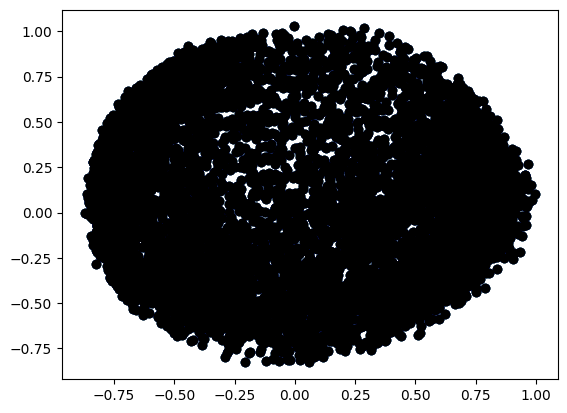

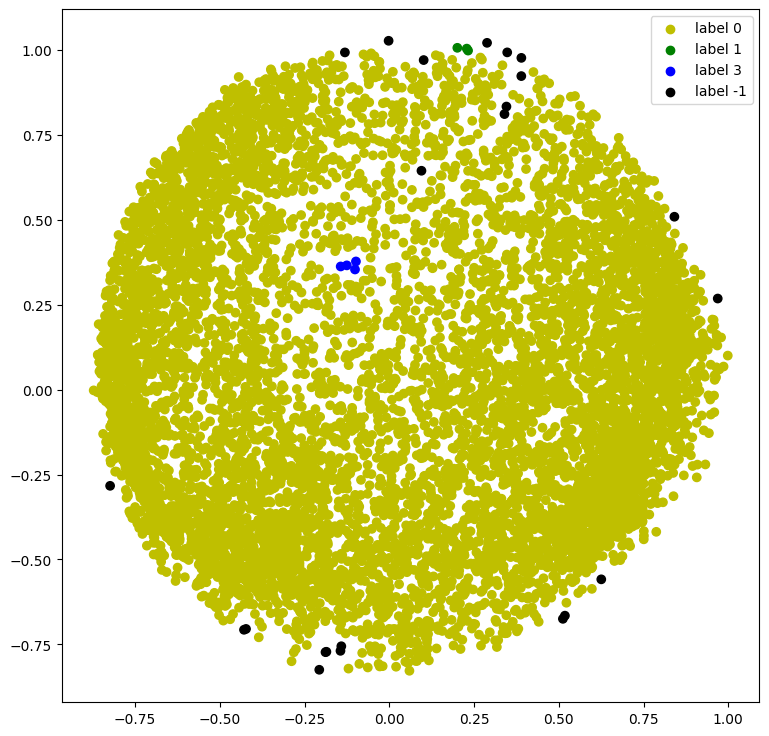

In [39]:
#4. DBSCAN(밀도 기반 집단 분석)모델 생성 및 훈련
db_default = DBSCAN(eps=0.0375, min_samples=3)
db_default.fit(x_principal)
labels = db_default.labels_ #모든 클러스터 레이블의 넘파이 배열 저장

colours = {} #출력 그래프 색상 위한 레이블
colours[0] = 'y'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

cvec = [ colours[label] for label in labels ] #각 분류에 대한 색상 벡터 생성

r = plt.scatter( x_principal['P1'], x_principal['P2'], color='y')
g = plt.scatter( x_principal['P1'], x_principal['P2'], color='g')
b = plt.scatter( x_principal['P1'], x_principal['P2'], color='b')
k = plt.scatter( x_principal['P1'], x_principal['P2'], color='k') #플롯(plot)의 범례(legend) 구성

plt.figure(figsize=(9,9))
plt.scatter( x_principal['P1'], x_principal['P2'], c=cvec ) #정의된 색상 벡터에 따라 x축에 P1, y축에 P2
plt.legend( (r,g,b,k), ('label 0','label 1', 'label 3', 'label -1') )
plt.show()

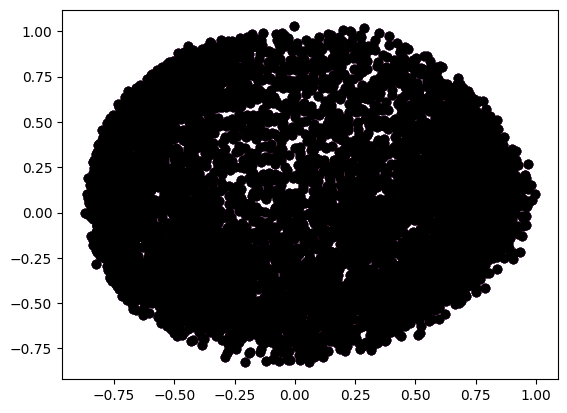

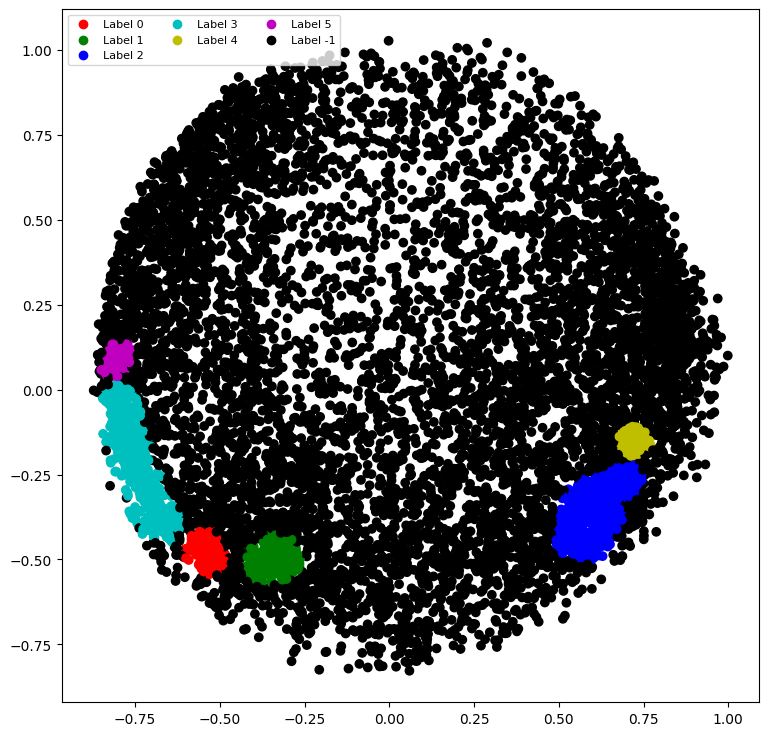

In [41]:
#5. 모델 튜닝
db = DBSCAN(eps=0.0375, min_samples=50).fit(x_principal) #min_samples(minPts)를 3->50으로 변경하여, 엡실론 내 데이터 개수 기준 높임
labels1 = db.labels_

colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [ colours1[label] for label in labels1 ]
colors1 = [ 'r', 'g', 'b', 'c', 'y', 'm', 'k' ]

r = plt.scatter( x_principal['P1'], x_principal['P2'], marker='o', color=colors1[0] )
g = plt.scatter( x_principal['P1'], x_principal['P2'], marker='o', color=colors1[1] )
b = plt.scatter( x_principal['P1'], x_principal['P2'], marker='o', color=colors1[2] )
c = plt.scatter( x_principal['P1'], x_principal['P2'], marker='o', color=colors1[3] )
y = plt.scatter( x_principal['P1'], x_principal['P2'], marker='o', color=colors1[4] )
m = plt.scatter( x_principal['P1'], x_principal['P2'], marker='o', color=colors1[5] )
k = plt.scatter( x_principal['P1'], x_principal['P2'], marker='o', color=colors1[-1] )

plt.figure(figsize=(9,9))
plt.scatter(x_principal['P1'], x_principal['P2'], c=cvec)
plt.legend( (r,g,b,c,y,m,k),
            ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'),
            scatterpoints=1,
            loc='upper left',
            ncol=3,
            fontsize=8 )
plt.show()

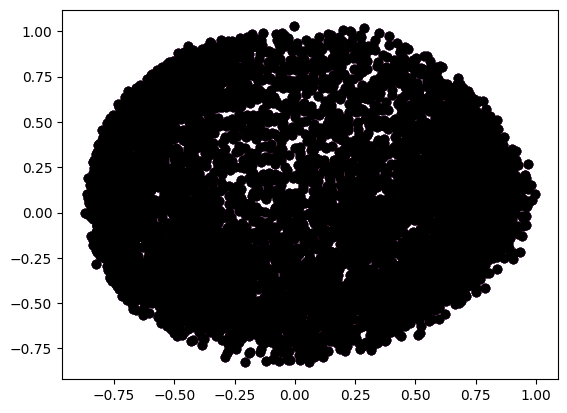

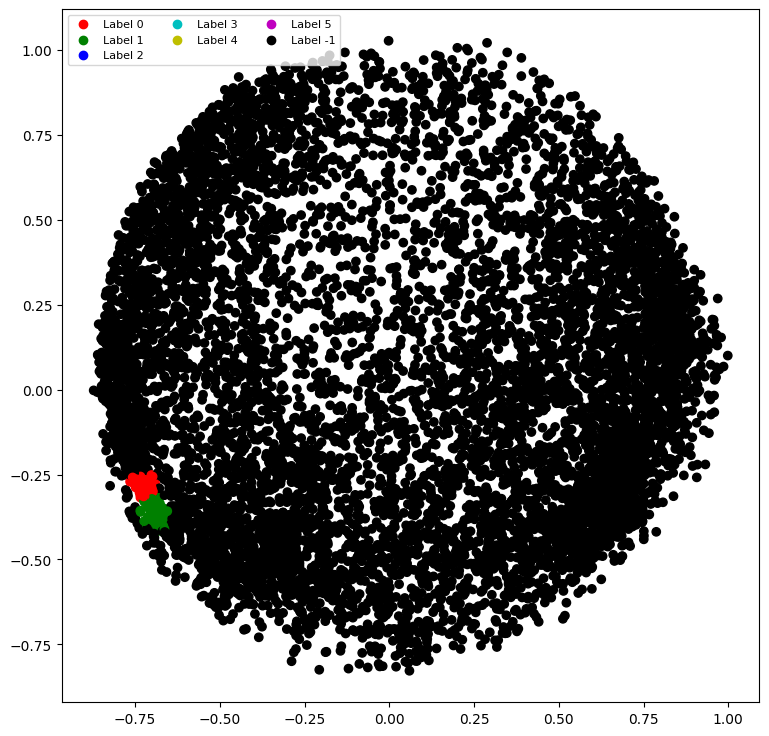

In [42]:
#6. 모델 튜닝(잘못된 예시)
db = DBSCAN(eps=0.0375, min_samples=100).fit(x_principal) #min_samples(minPts)가 100, 많은 클러스터 부분이 무시되어 성능이 낮아짐
labels1 = db.labels_

colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [ colours1[label] for label in labels1 ]
colors1 = [ 'r', 'g', 'b', 'c', 'y', 'm', 'k' ]

r = plt.scatter( x_principal['P1'], x_principal['P2'], marker='o', color=colors1[0] )
g = plt.scatter( x_principal['P1'], x_principal['P2'], marker='o', color=colors1[1] )
b = plt.scatter( x_principal['P1'], x_principal['P2'], marker='o', color=colors1[2] )
c = plt.scatter( x_principal['P1'], x_principal['P2'], marker='o', color=colors1[3] )
y = plt.scatter( x_principal['P1'], x_principal['P2'], marker='o', color=colors1[4] )
m = plt.scatter( x_principal['P1'], x_principal['P2'], marker='o', color=colors1[5] )
k = plt.scatter( x_principal['P1'], x_principal['P2'], marker='o', color=colors1[-1] )

plt.figure(figsize=(9,9))
plt.scatter(x_principal['P1'], x_principal['P2'], c=cvec)
plt.legend( (r,g,b,c,y,m,k),
            ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'),
            scatterpoints=1,
            loc='upper left',
            ncol=3,
            fontsize=8 )
plt.show()